## RQ 2: What is the performance distribution given the respective achievement level of the pair programmers?

Investigation of debugging scores differences basing from achievement level groups 
- Determine each student’s achievement level by mean score -- when pre-test score is below the mean, the student will be tagged as a Low performer, and the otherwise High performer
- Assign pairs to three achievement level groups: High-High, High-Low, and Low-Low performers
- Assign the pair’s debugging score differences to the achievement level groups
- Investigate properties through distribution analysis


In [105]:
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [123]:
cols_classes = ['ArgCcl', 'ArgCnt', 'ArgCon', 'ArgEla', 'ArgRsn', 'EliOpn', 'EliPrp', 'EliSet', 'EliVer',
                'ImpAct', 'ImpFoc', 'InfAct', 'InfNeg', 'InfNeu', 'InfNon', 'InfPos', 'InfSoc', 'InfSol',
                'InfStm', 'ResCfm', 'ResDen','ResSol', 'ResStm']
class_group = ['Arg', 'Eli', 'Imp', 'Inf', 'Res']
cols_classes_groups = ['grp_' + grp for grp in class_group]
cols_tests = ['pre_test_score', 'self_efficacy', 'debugging_scores']

In [128]:
stud_df = pd.read_csv("data/proc/student_data.csv", index_col="student")

In [129]:
stud_df["static_or_dynamic"].value_counts()

Static     59
Dynamic    50
Name: static_or_dynamic, dtype: int64

In [137]:
df_stud_static = df[df["static_or_dynamic"] == "Static"]
df_stud_dynamic = df[df["static_or_dynamic"] == "Dynamic"]

ds_static_cutoff = df_static["debugging_scores"].mean()
ds_dynamic_cutoff = df_dynamic["debugging_scores"].mean()

df_stud_static["debugging_perf"] = df_stud_static["debugging_scores"].apply(lambda x: "L" if x < ds_static_cutoff else "H")
df_stud_dynamic["debugging_perf"] = df_stud_dynamic["debugging_scores"].apply(lambda x: "L" if x < ds_dynamic_cutoff else "H")

/home/jerelyn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/jerelyn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
stud_df = df_stud_static.append(df_stud_dynamic)

In [162]:
temp_remove_pair = {'ADDU-DP02', 'ADDU-SP04'} 
unique_pairs = set(stud_df.index.str[:-1]) - temp_remove_pair
pair_df = pd.DataFrame(index=unique_pairs, columns=cols_classes + cols_tests + ['school', 'static_or_dynamic', 'gender', 'debugging_perf_pair'])

for pair in unique_pairs:
    pair_df.loc[pair][cols_tests] = stud_df.loc[pair + 'A'].get(cols_tests).subtract(stud_df.loc[pair + 'B'].get(cols_tests)).abs()
    stud_a_perf = stud_df.loc[pair+'A'].get("debugging_perf")
    stud_b_perf = stud_df.loc[pair+'B'].get("debugging_perf")
    if stud_a_perf == stud_b_perf:
        if stud_a_perf == "H":
            pair_df.loc[pair]["debugging_perf_pair"] = "HH"
        else:
            pair_df.loc[pair]["debugging_perf_pair"] = "LL"
    else:
        pair_df.loc[pair]["debugging_perf_pair"] = "HL"
    pair_df.loc[pair][['school', 'static_or_dynamic', 'gender']] = stud_df.loc[pair + 'A'][['school', 'static_or_dynamic', 'gender']]
pair_df[cols_tests] = pair_df[cols_tests].apply(pd.to_numeric, errors='coerce', axis=1)

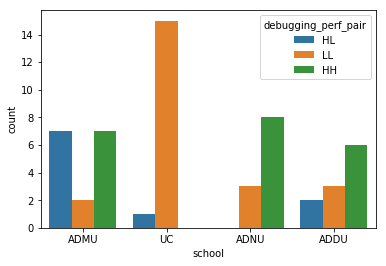

In [170]:
sns.countplot(x="school", hue="debugging_perf_pair", data=pair_df)

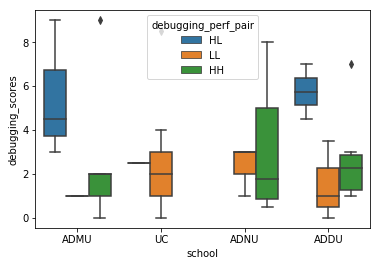

In [172]:
sns.boxplot(x="school", y="debugging_scores", hue="debugging_perf_pair", data=pair_df)